# 0.) Import and Clean data

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv('bank-additional-full (1).csv', delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

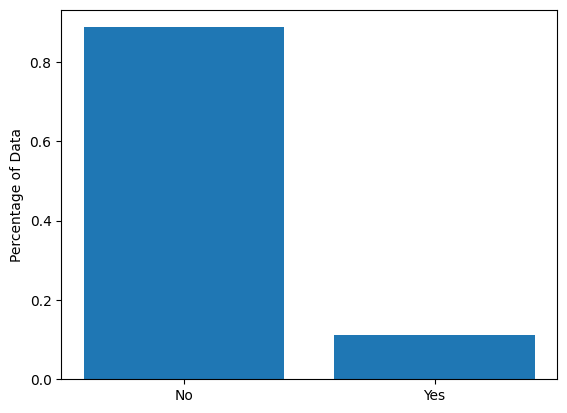

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# ros = RandomOverSampler()
# over_X, over_y = ros.fit_resample(X_scaled, y_train)

# X_scaled = over_X
# y_train = over_y

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

X_scaled = smote_X
y_train = smote_y

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [11]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.122\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.449\ngini = 0.313\nsamples = 21039\nvalue = [16952, 4087]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= -0.055\ngini = 0.139\nsamples = 11835\nvalue = [10945, 890]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.119\nsamples = 11573\nvalue = [10837, 736]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.485\nsamples = 262\nvalue = [108, 154]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.317\ngini = 0.453\nsamples = 9204\nvalue = [6007, 3197]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 6770\nvalue = [3665, 3105]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.073\nsamples = 2434\nvalue = [2342, 92]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.409\nsamples = 30121\nvalue = [8628, 21493]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.758\ngini = 0.329\nsamples = 24826\nvalue = [5144, 19682]\ncl

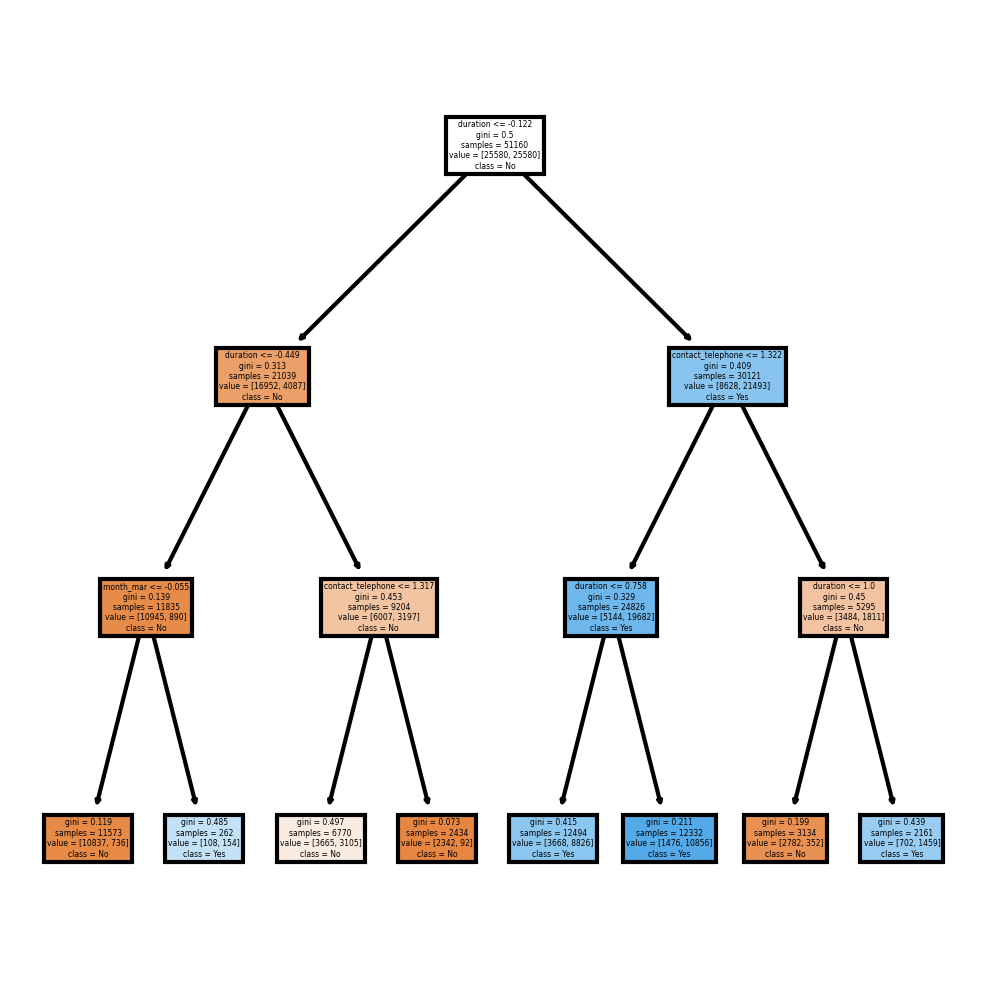

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

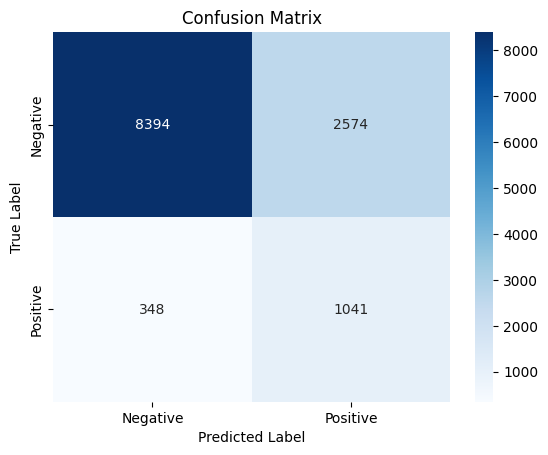

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
decisiontree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(base_estimator = decisiontree,
                           n_estimators = 100,
                           max_samples = 0.5,
                           max_features = 0.5)

/Users/consgong/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/consgong/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


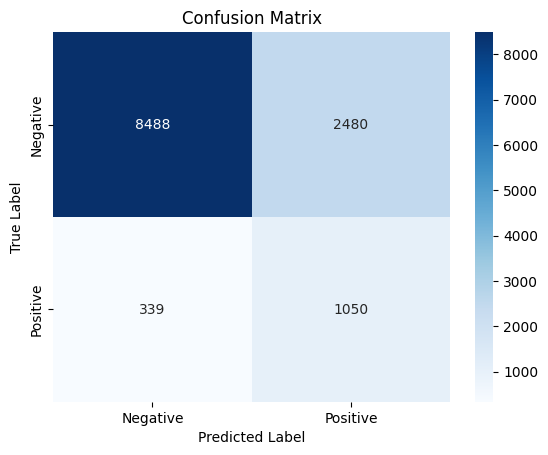

In [19]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)


y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)


# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
adaboost = AdaBoostClassifier(base_estimator = decisiontree,
                           n_estimators = 100)

In [22]:
adaboost.fit(X_scaled, y_train)


/Users/consgong/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/consgong/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

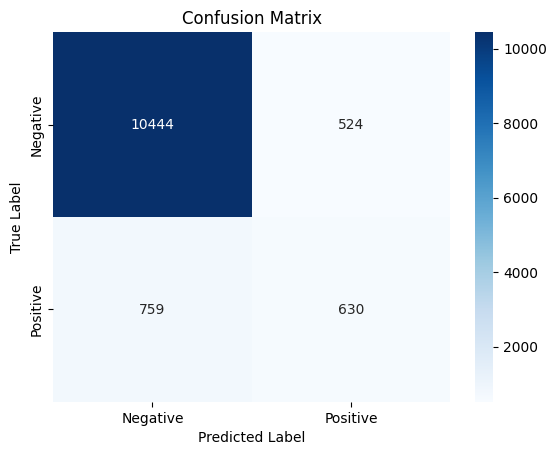

In [23]:
y_pred = adaboost.predict(X_test)


y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)


# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

In [24]:

predictions = [adaboost.predict(X_scaled), bagging.predict(X_scaled), dtree_main.predict(X_scaled)]
X_base_learners = np.column_stack(predictions)
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)

/Users/consgong/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
super_learner.coef_
# from the coefficients, we can tell that the weight of adaboost is much higher than the other two.
# we can also tell from the CWs above, the adaboost performs better.

array([[5.1067107 , 1.09304201, 0.62926203]])

# 6.)